In [1]:
#openCV 설치
!pip install opencv-python

In [11]:
import os
import numpy as np
import cv2

import matplotlib.pyplot as plt

In [12]:
image_path = '/content/drive/MyDrive/rokey/AI/application/cat.png'

In [23]:
image = cv2.imread(image_path)

src = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# blur(적용할 이미지, 커널크기)
dst = cv2.blur(src, (11,11))

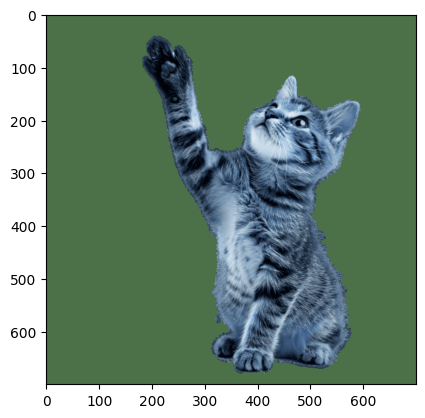

In [20]:
plt.imshow(image) # 원본(BGR)

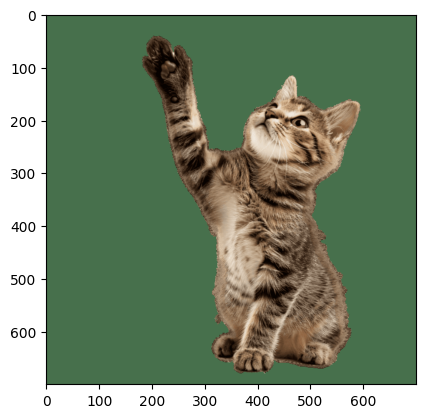

In [21]:
plt.imshow(src) # 변경(RGB)

커널 크기에 따라 blur 효과가 달라짐
- 3*3 커널: 약간 흐림
- 5*5 커널: 중간적 흐림
- 11*11 커널: 많이 흐림

왜 이런 일이?
- 작은 커널(3*3): 주변에 9개 픽셀의 평균
 - 가까운 픽셀에만 영향을 받음
- 큰 커널(11*11): 주변에 121개 픽셀의 평균
 - 먼 곳의 픽셀에도 영향을 받음

blur 왜 쓰나?
- 노이즈 제거
- 오래된 사진 복원 시 사용(노이즈가 많음)
- background 블러 처리(디텍션에 방해)
- 블러로 이미지 노이즈 제거(전처리)해서 그 데이터로 학습!! 그래서 중요하다.



##### 커널 크기 규칙

- 홀수만 사용합니다(중앙값 필요하니까)
- 실제 사용: (3,3), (5,5), (7,7), (11,11)

- 왜 홀수인가요?
 - 짝수면 정중앙값이 없어지니까
 - 중앙값이 명확 >> 중앙값을 알면 타겟을 정할 수 있고, 연산이 편해짐(ex. padding)


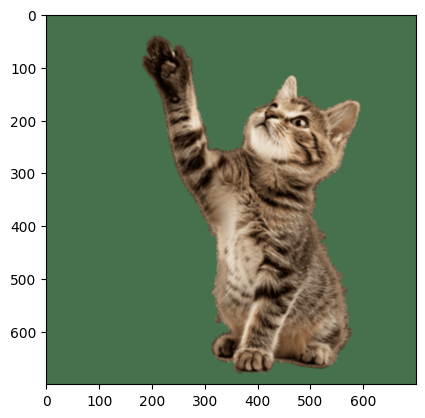

In [25]:
dst = cv2.blur(src, (3,3))  # 3x3 : 홀수이어야 중앙값이 생겨서?
plt.imshow(dst) # 3x3 커널로 블러

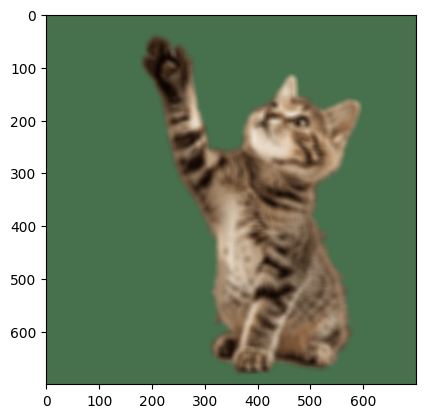

In [24]:
dst = cv2.blur(src, (11,11))
plt.imshow(dst) # 11x11 커널로 블러

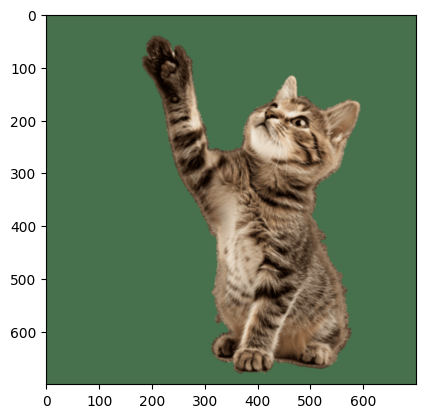

In [28]:
# GaussianBlur() : 가우시안 >> 정규화
# ksize = 커널 사이즈, sigmaX = 표준편차
# sigmaX = 0 >> 0이면 openCV가 잘 계산
# opencv의 가우시안 블러에서 sigmaX=0은 0을 시그마에 대입하겠다는 의미가 아니라
# 자동으로 유효한 값을 표준편차로 넣겠다 라는 뜻이라네요
dst = cv2.GaussianBlur(src, ksize=(3,3), sigmaX=0)
plt.imshow(dst)

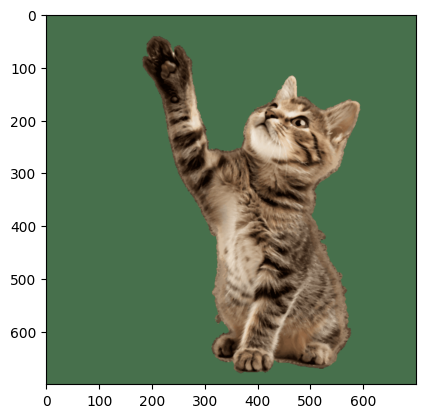

In [29]:
# medianBlur()

dst = cv2.medianBlur(src, 3)
plt.imshow(dst)

In [32]:
픽셀값 = [10, 20, 30, 200, 40]

print(f'평균:{np.mean(픽셀값)}') # 60
print(f'중앙값(=중위값):{np.median(픽셀값)}') #30.0

print('중위값이 평균보다 값을 더 잘 표현한다.')

평균:60.0
중앙값(=중위값):30.0
중위값이 평균보다 값을 더 잘 표현한다.


#### blur VS GaussianBlur
1. blur() : 모든 픽셀에 대해 동일한 가중치 부여 / 간단하게 알아볼 때, 가벼움
2. GaussianBlur() : 중앙 픽셀에 더 큰 가중치 부여 / 가장 많이 쓰임, 조금 무거움
3. medianBlur(): median(중위수, 중앙값) 사용(평균이 아니고) >> 평균의 가장 큰 문제(이상치 반영) 해결 / 점 잡음 제거 효과적, 엣지 보존

#### 가우시안 분포
중앙에 값이 많음
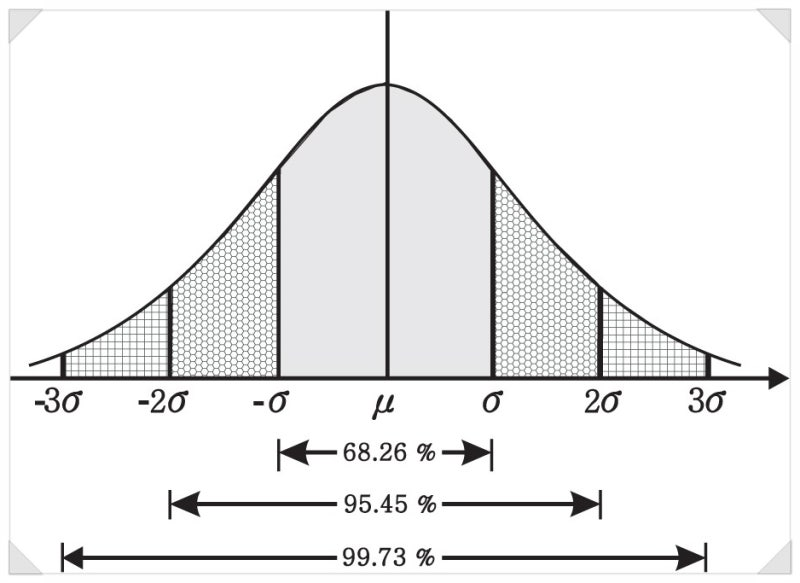

침식(erosion), 팽창(dilate), 열기(opening), 닫기(closing)

강의_6기_AI개론_1차시_03_OpenCV 필터링.ipynb

In [76]:
image_path = '/content/drive/MyDrive/rokey/AI/application/salt.jpg'
# image_path = '/content/drive/MyDrive/rokey/AI/application/salt_black_white.png'

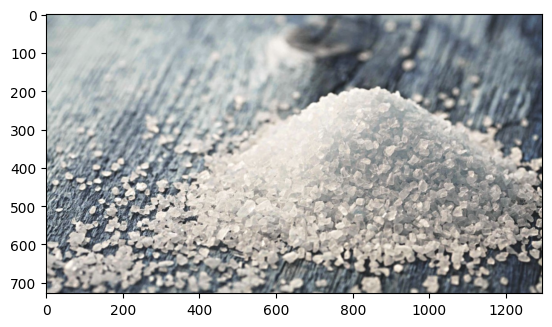

In [77]:
src = cv2.imread(image_path)
plt.imshow(src)

In [79]:
cv2.threshold(src, 127, 255, cv2.THRESH_BINARY)

(127.0,
 array([[[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [  0,   0,   0],
         [  0,   0,   0],
         [  0,   0,   0]],
 
        [[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [  0,   0,   0],
         [  0,   0,   0],
         [  0,   0,   0]],
 
        [[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [  0,   0,   0],
         [  0,   0,   0],
         [  0,   0,   0]],
 
        ...,
 
        [[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],
 
        [[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],
 
        [[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255, 

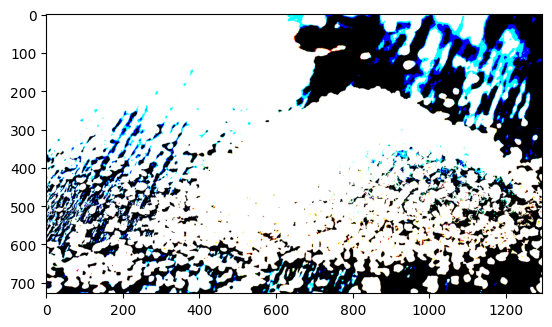

In [80]:
#1. 이진화(Binary) - 0, 1 => 흑백 / 임계값(기준값)을 넘으면 255, 모자라면 0
#cv2.threshold(적용할 이미지, 임계값(기준), 기준을 넘으면? : 255로 만들어, 옵션)

result, binary_image = cv2.threshold(src, 127, 255, cv2.THRESH_BINARY)
# 127 : 임계값(기준), 255:임계값 넘는 픽셀을 255(white)로 만들어
# cv2.THRES_BINARY : 이진화 방식 채택
plt.imshow(binary_image) # plt의 colormap이 적용돼서 파란색 나옴

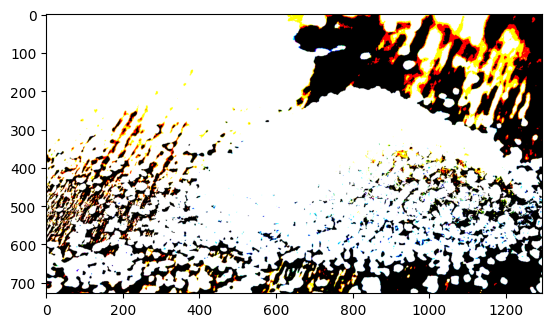

In [81]:
plt.imshow(cv2.cvtColor(binary_image, cv2.COLOR_BGR2RGB), cmap='gray')

In [82]:
# 커널 만들기
# np.empty(사이즈), np.zeros(사이즈)
# >> 사이즈 크기만큼 비어있는 객체 생성 / 사이즈 크기만큼 0으로 채워진 객체 생성

kernel = np.ones((3,3), np.uint8)
kernel

array([[1, 1, 1],
       [1, 1, 1],
       [1, 1, 1]], dtype=uint8)

#### 팽창, 침식 적용
- erosion 침식
  - 흰색 영역(255)의 외곽을 깎아내는 연산
  - 커널이 완전히 흰색을 포함하는 영역만 유지, 나머지는 검정(0)으로 바꿔
  - 객체가 작아져요(외곽이 깎였으니까), 작은 노이즈 제거(작은 점 형태 흰색 잡음 제거)

 - dialtion 확대(팽창)
   - 흰색 영역(255) 넓혀줘요
   - 커널이 1개라도 흰색 만나면 중심 픽셀을 흰색으로 확장
   - 객체가 커져요(빈 공간 채워주니까), 끊긴 선 연결(문자, 윤곽선 연결), 구멍 채워줘요

  erosion : 완벽하게 흰색인 곳만 살리기 = 애매하게 흰색인 곳은 버림
  
dilate: 흰색이 조금만 있어도 살리기 = 흰색이 아예 없는 곳만 버림

실무 Tip
1. Binary (0-255)
2. erosion(침식, 줄어들고 잡음 제거/잡음 많은 경우) 또는 dailtion(커짐, 끊김 영역 연결) (data에 따라)

- 일반적으로 외부 노이즈가 문제면 opening 사용
- 내부 구멍이 문제면 closing 사용
- 둘 다 문제면 opening 사용 후, closing

In [85]:
image_path = '/content/drive/MyDrive/rokey/AI/application/salt.jpg'
# image_path = '/content/drive/MyDrive/rokey/AI/application/salt_black_white.png'

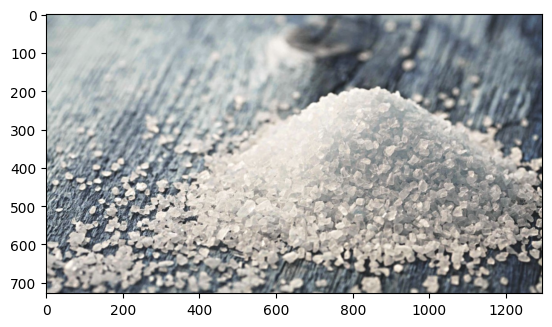

In [86]:
src = cv2.imread(image_path)
plt.imshow(src)

Text(0.5, 1.0, 'dilate')

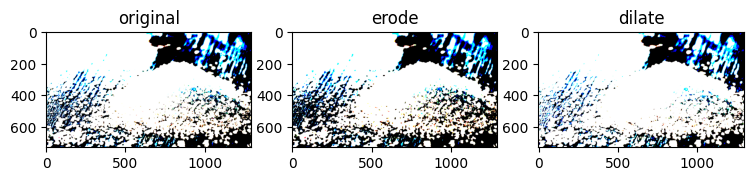

In [87]:
# 팽창, 침식 적용
# erosion 침식
# >> 흰색 영역(255)의 외곽을 깎아내는 연산
# >> 커널이 완전히 흰색을 포함하는 영역만 유지, 나머지는 검정(0)으로 바꿔
# >> 잡음 제거, 객체 작아짐
erode_image = cv2.erode(binary_image, kernel, iterations=1)
dilate_image = cv2.dilate(binary_image, kernel, iterations=1)

fig, axes = plt.subplots(1,3, figsize=(9,3))
axes[0].imshow(binary_image)
axes[0].set_title('original')
axes[1].imshow(erode_image)
axes[1].set_title('erode')
axes[2].imshow(dilate_image)
axes[2].set_title('dilate')

- opening = erosion >> dilation
  - noise 제거 후, 모형 유지(노이즈 제거한 구멍 채우기)
- closing = dilation >> erosion
  - 끊긴 윤곽선 연결

Text(0.5, 1.0, 'close')

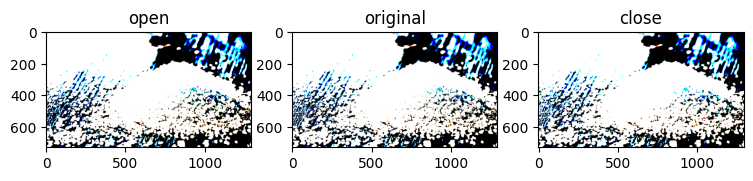

In [84]:
# 이진화(binary) : 0 or 1 (흑백)
# 임계값(기준) 넘으면 255, 모자라면 0
# cv2.threshold(적용할 이미지, 임계값(기준), 기준을 넘으면? 255로 만들어)

result, binary_image = cv2.threshold(src, 127, 255, cv2.THRESH_BINARY)
# plt.imshow(binary_image)

# 커널 만들기
kernel = np.ones((3,3), np.uint8)

# 열기, 닫기
opening = cv2.morphologyEx(binary_image, cv2.MORPH_OPEN, kernel)
closing = cv2.morphologyEx(binary_image, cv2.MORPH_CLOSE, kernel)

fig, axes = plt.subplots(1, 3, figsize=(9,3))

axes[0].imshow(opening)
axes[0].set_title('open') # opening이 제일 많이 쓰인다
axes[1].imshow(binary_image)
axes[1].set_title('original')
axes[2].imshow(closing)
axes[2].set_title('close')